In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('train.csv')

In [14]:
SalePrice =  pd.DataFrame(train["SalePrice"])
CentralAir =  pd.DataFrame(train["CentralAir"])
SalePrice_train, SalePrice_test, CentralAir_train,  CentralAir_test = train_test_split(SalePrice, CentralAir, test_size = 0.20)

CentralAir_train.describe()


,CentralAir
count,1168
unique,2
top,Y
freq,1090


In [15]:
type(CentralAir_train["CentralAir"])


pandas.core.series.Series

In [17]:
CentralAir_train["CentralAir"].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree2 = DecisionTreeClassifier(max_depth = 2)
dectree4 = DecisionTreeClassifier(max_depth = 4)



In [20]:
dectree2.fit(SalePrice_train, CentralAir_train)


DecisionTreeClassifier(max_depth=2)

In [21]:
dectree4.fit(SalePrice_train, CentralAir_train)

DecisionTreeClassifier(max_depth=4)

[Text(334.8, 543.6, 'SalePrice <= 107700.0\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass =  Have Air-Con'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.484\nsamples = 122\nvalue = [50, 72]\nclass =  Have Air-Con'),
 Text(83.7, 108.72000000000003, "gini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Don't haveAircon"),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.45\nsamples = 108\nvalue = [37, 71]\nclass =  Have Air-Con'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.052\nsamples = 1046\nvalue = [28, 1018]\nclass =  Have Air-Con'),
 Text(418.5, 108.72000000000003, 'gini = 0.156\nsamples = 247\nvalue = [21, 226]\nclass =  Have Air-Con'),
 Text(585.9, 108.72000000000003, 'gini = 0.017\nsamples = 799\nvalue = [7, 792]\nclass =  Have Air-Con')]

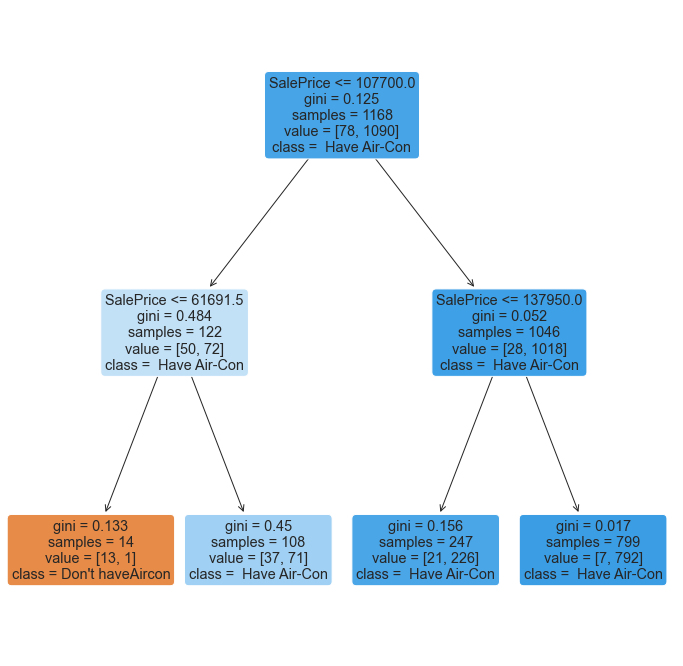

In [91]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Don't haveAircon"," Have Air-Con"])

[Text(802.125, 587.0880000000001, 'SalePrice <= 107700.0\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass =  Have Air-Con'),
 Text(383.625, 456.624, 'SalePrice <= 61691.5\ngini = 0.484\nsamples = 122\nvalue = [50, 72]\nclass =  Have Air-Con'),
 Text(209.25, 326.1600000000001, "SalePrice <= 52250.0\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Don't haveAircon"),
 Text(139.5, 195.69600000000003, "SalePrice <= 46000.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Don't haveAircon"),
 Text(69.75, 65.23200000000008, "gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Don't haveAircon"),
 Text(209.25, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass =  Have Air-Con'),
 Text(279.0, 195.69600000000003, "gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Don't haveAircon"),
 Text(558.0, 326.1600000000001, 'SalePrice <= 91250.0\ngini = 0.45\nsamples = 108\nvalue = [37, 71]\nclass =  Have Air-Con'),
 Text(418.5, 195.69600000000003, 'SalePrice <= 89750.0\ngini 

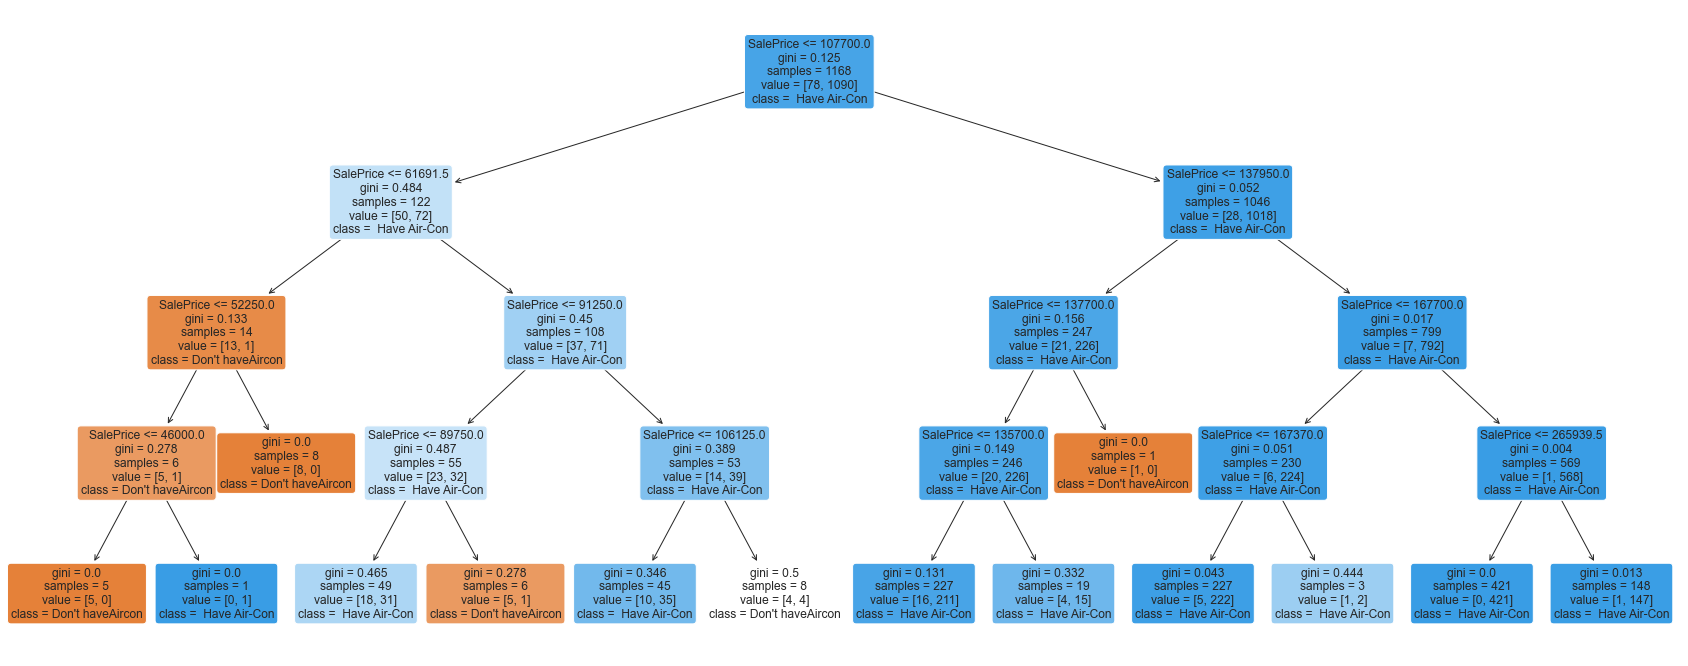

In [103]:
f = plt.figure(figsize=(30,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Don't haveAircon"," Have Air-Con"])

In [47]:
CentralAir_pred2 = dectree2.predict(SalePrice_train)



In [48]:
CentralAir_pred4 = dectree4.predict(SalePrice_train)

Classification Accuracy 	: 0.9434931506849316


<AxesSubplot:>

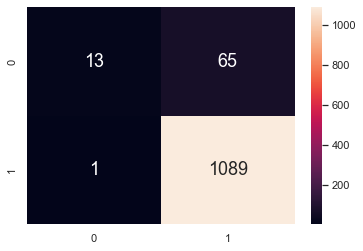

In [49]:
print("Classification Accuracy \t:", dectree2.score(SalePrice_train, CentralAir_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(CentralAir_train, CentralAir_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9486301369863014


<AxesSubplot:>

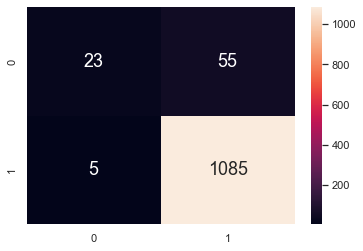

In [50]:
print("Classification Accuracy \t:", dectree4.score(SalePrice_train, CentralAir_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(CentralAir_train, CentralAir_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [58]:
CentralAirTest_pred2 = dectree2.predict(SalePrice_test)

In [59]:
CentralAirTest_pred4 = dectree4.predict(SalePrice_test)

Classification Accuracy 	: 0.9383561643835616


<AxesSubplot:>

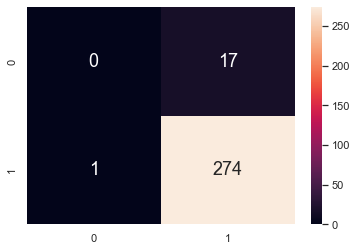

In [61]:
print("Classification Accuracy \t:", dectree2.score(SalePrice_test, CentralAir_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(CentralAir_test, CentralAirTest_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.934931506849315


<AxesSubplot:>

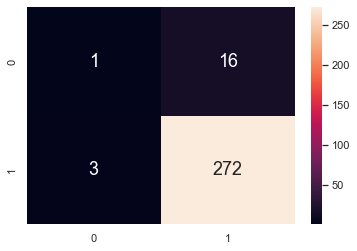

In [62]:
print("Classification Accuracy \t:", dectree4.score(SalePrice_test, CentralAir_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(CentralAir_test, CentralAirTest_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [120]:
tn, fp, fn, tp = confusion_matrix(CentralAir_train, CentralAir_pred2).ravel()
tn, fp, fn, tp

(13, 65, 1, 1089)

In [121]:
tn, fp, fn, tp = confusion_matrix(CentralAir_test, CentralAirTest_pred2).ravel()
tn, fp, fn, tp

(0, 17, 1, 274)

In [122]:
tn, fp, fn, tp = confusion_matrix(CentralAir_train, CentralAir_pred4).ravel()
tn, fp, fn, tp

(23, 55, 5, 1085)

In [123]:
tn, fp, fn, tp = confusion_matrix(CentralAir_test, CentralAirTest_pred4).ravel()
tn, fp, fn, tp

(1, 16, 3, 272)

The depth 4 has the better model because it has a lower False Negative and Positive for both train and test. The classification accuracy for train dept 4 is the highest among the three

Question 2

In [98]:
y = pd.DataFrame(train['CentralAir'])
X = pd.DataFrame(train[["OverallQual", "YearBuilt"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)   

DecisionTreeClassifier(max_depth=4)

[Text(792.1607142857142, 587.0880000000001, 'YearBuilt <= 1925.5\ngini = 0.12\nsamples = 1168\nvalue = [75, 1093]\nclass = Have Aircon'),
 Text(388.60714285714283, 456.624, 'YearBuilt <= 1917.5\ngini = 0.448\nsamples = 136\nvalue = [46, 90]\nclass = Have Aircon'),
 Text(239.14285714285714, 326.1600000000001, 'YearBuilt <= 1909.0\ngini = 0.495\nsamples = 67\nvalue = [30, 37]\nclass = Have Aircon'),
 Text(119.57142857142857, 195.69600000000003, 'YearBuilt <= 1877.5\ngini = 0.435\nsamples = 25\nvalue = [8, 17]\nclass = Have Aircon'),
 Text(59.785714285714285, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Dont have Aircon'),
 Text(179.35714285714286, 65.23200000000008, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]\nclass = Have Aircon'),
 Text(358.7142857142857, 195.69600000000003, 'YearBuilt <= 1913.5\ngini = 0.499\nsamples = 42\nvalue = [22, 20]\nclass = Dont have Aircon'),
 Text(298.92857142857144, 65.23200000000008, 'gini = 0.444\nsamples = 18\nvalue = [12, 6]\ncl

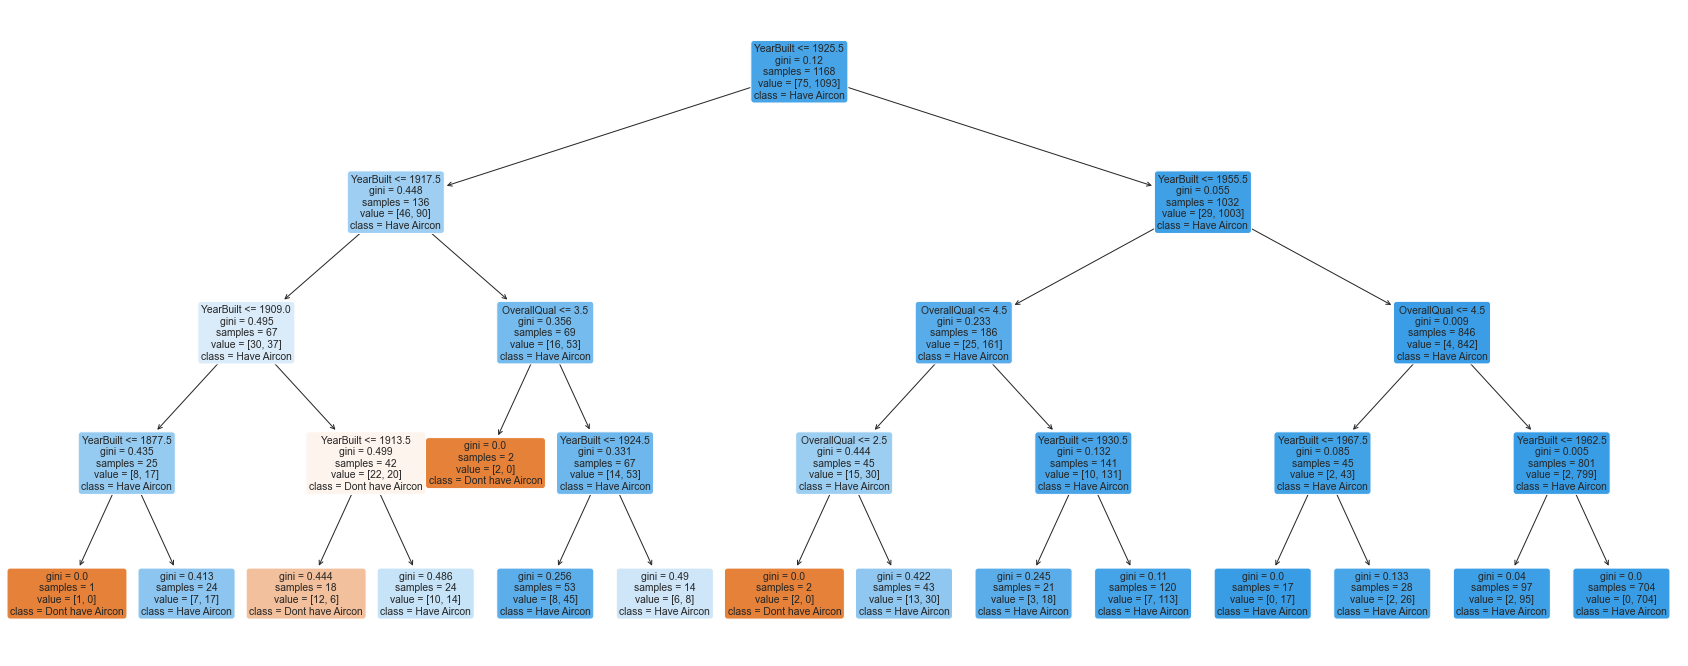

In [104]:
f = plt.figure(figsize=(30,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Dont have Aircon","Have Aircon"])

YearBuilt is the stronger predictor, as the the first decision is based by the YearBuilt


Question 3

[Text(802.125, 587.0880000000001, "SalePrice <= 107700.0\ngini = 0.125\nsamples = 1168\nvalue = [78, 1090]\nclass = Don't have Air-Con"),
 Text(383.625, 456.624, "SalePrice <= 61691.5\ngini = 0.484\nsamples = 122\nvalue = [50, 72]\nclass = Don't have Air-Con"),
 Text(209.25, 326.1600000000001, 'SalePrice <= 52250.0\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Have Aircon'),
 Text(139.5, 195.69600000000003, 'SalePrice <= 46000.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Have Aircon'),
 Text(69.75, 65.23200000000008, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Have Aircon'),
 Text(209.25, 65.23200000000008, "gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Don't have Air-Con"),
 Text(279.0, 195.69600000000003, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Have Aircon'),
 Text(558.0, 326.1600000000001, "SalePrice <= 91250.0\ngini = 0.45\nsamples = 108\nvalue = [37, 71]\nclass = Don't have Air-Con"),
 Text(418.5, 195.69600000000003, "SalePrice <= 89750.0\ngini 

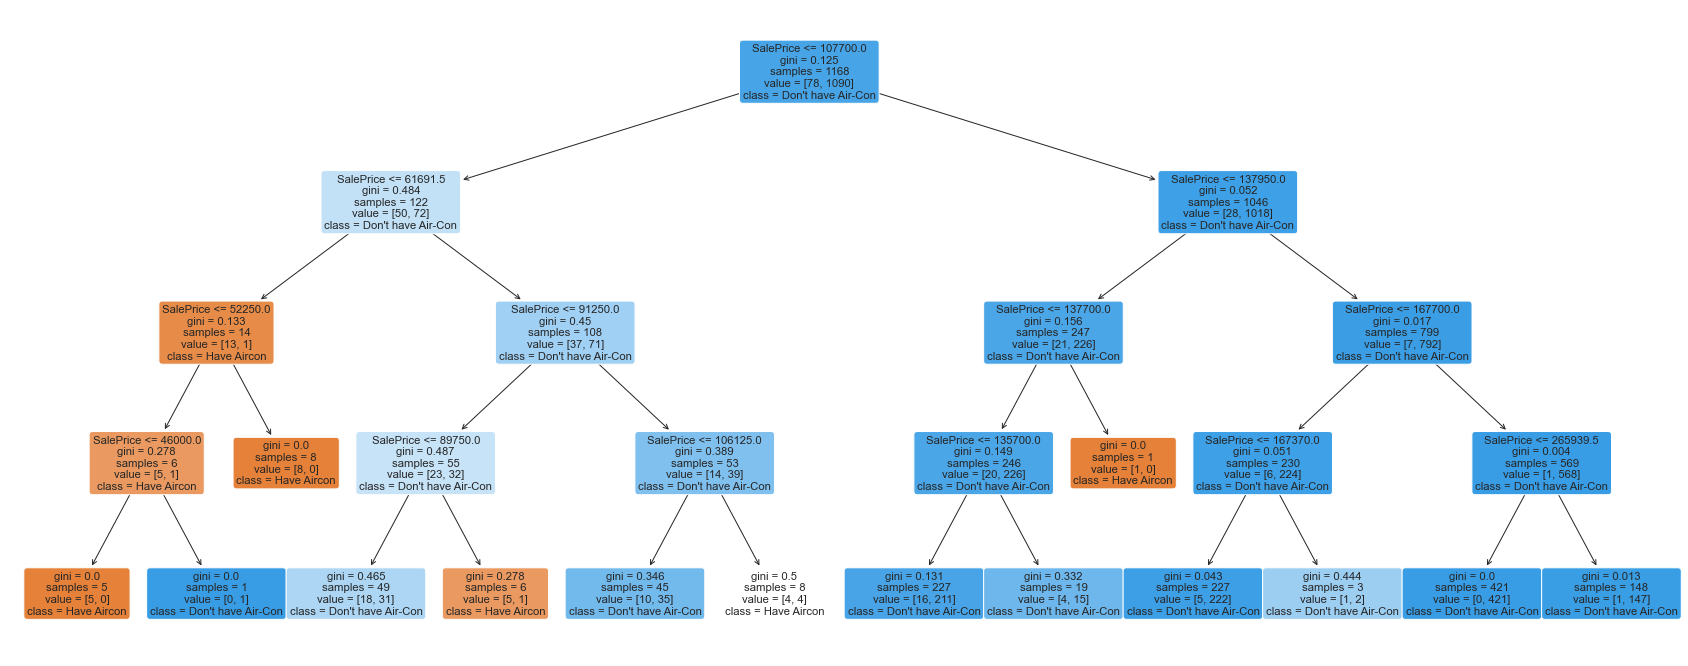

In [105]:
f = plt.figure(figsize=(30,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Have Aircon","Don't have Air-Con"])

The node with the highest false postive is node with the sample of 49 and 18 for false positive.


In [117]:
case = pd.concat([SalePrice_train, CentralAir_train], axis = 1).reindex(SalePrice_train.index)
case = case[(case["SalePrice"] <= 89750) & (case["SalePrice"] > 61691.5)].reset_index(drop=True)
print(case)


    SalePrice CentralAir
0       79900          Y
1       86000          Y
2       88000          N
3       62383          Y
4       84500          Y
5       81000          Y
6       79000          N
7       76000          N
8       82500          Y
9       85400          Y
10      75000          Y
11      76500          Y
12      81000          Y
13      80000          Y
14      84000          N
15      79000          Y
16      81000          Y
17      78000          N
18      89500          Y
19      73000          N
20      85000          N
21      80000          Y
22      80000          Y
23      85000          Y
24      82000          N
25      88000          Y
26      79900          Y
27      80500          N
28      84500          N
29      87000          N
30      87500          N
31      82500          Y
32      79000          N
33      68400          Y
34      89500          Y
35      67000          Y
36      88000          Y
37      85500          Y
38      84900          Y


In [116]:
case = case[(case["CentralAir"] == "N")].reset_index(drop=True)
print(case)

    SalePrice CentralAir
0       88000          N
1       79000          N
2       76000          N
3       84000          N
4       78000          N
5       73000          N
6       85000          N
7       82000          N
8       80500          N
9       84500          N
10      87000          N
11      87500          N
12      79000          N
13      87000          N
14      83000          N
15      67000          N
16      85000          N
17      82000          N
